# Workshop_ETL3

## Importacion de los datos

In [1]:
import pandas as pd
import joblib
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Data del 2015

In [2]:
data_2015_csv = '../data/2015.csv' 
data_2015 = pd.read_csv(data_2015_csv, delimiter=',') 
#print(data_2015.head())
print(data_2015.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

## Data del 2016

In [3]:
data_2016_csv = '../data/2016.csv' 
data_2016 = pd.read_csv(data_2016_csv, delimiter=',') 
#print(data_2016.head())
print(data_2016.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

## Data del 2017

In [4]:
data_2017_csv = '../data/2017.csv' 
data_2017 = pd.read_csv(data_2017_csv, delimiter=',') 
#print(data_2017.head())
print(data_2017.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

## Data del 2018

In [5]:
data_2018_csv = '../data/2018.csv' 
data_2018 = pd.read_csv(data_2018_csv, delimiter=',') 
#print(data_2018.head())
print(data_2018.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
None


## Data del 2019

In [6]:
data_2019_csv = '../data/2019.csv' 
data_2019 = pd.read_csv(data_2019_csv, delimiter=',') 
#print(data_2019.head())
print(data_2019.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
None


## Analisis de las columnas del dataset (2015)

In [7]:
data_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## Revision de valores nulos en los datasets (2015)

In [8]:
print(data_2015.isnull().sum())


Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


## Revision de valores duplicados (2015)

In [9]:
# Suponiendo que data_2015 es tu DataFrame
duplicados = data_2015.duplicated().sum()

# Imprimir la cantidad de filas duplicadas
print("Cantidad de filas duplicadas en data_2015:", duplicados)

Cantidad de filas duplicadas en data_2015: 0


## Numero de filas y columnas (2015)

In [10]:
# Obtener la forma (número de filas y columnas) del DataFrame
filas, columnas = data_2015.shape

# Imprimir el número de filas y columnas
print("Número de filas en data_2015:", filas)
print("Número de columnas en data_2015:", columnas)


Número de filas en data_2015: 158
Número de columnas en data_2015: 12


## Normalizacion de los nombres de las columnas (2015)

In [11]:
# Convertir los nombres de las columnas a minúsculas
data_2015.columns = data_2015.columns.str.lower()

# Mostrar las primeras filas del DataFrame con los nombres de las columnas en minúsculas
print(data_2015.head())



       country          region  happiness rank  happiness score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   standard error  economy (gdp per capita)   family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   health (life expectancy)  freedom  trust (government corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

## Analisis de las columnas del dataset (2016)

In [12]:
data_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


## Revision de valores nulos en los datasets (2016)

In [13]:
print(data_2016.isnull().sum())

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


## Numero de filas y columnas (2016)

In [14]:
# Obtener la forma (número de filas y columnas) del DataFrame
filas, columnas = data_2016.shape

# Imprimir el número de filas y columnas
print("Número de filas en data_2015:", filas)
print("Número de columnas en data_2015:", columnas)

Número de filas en data_2015: 157
Número de columnas en data_2015: 13


## Normalizacion de los nombres de las columnas (2016)

In [15]:
# Convertir los nombres de las columnas a minúsculas
data_2016.columns = data_2016.columns.str.lower()

# Mostrar las primeras filas del DataFrame con los nombres de las columnas en minúsculas
print(data_2016.head())


       country          region  happiness rank  happiness score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   lower confidence interval  upper confidence interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   economy (gdp per capita)   family  health (life expectancy)  freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                

## Analisis de las columnas del dataset (2017)

In [16]:
data_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


## Revision de valores nulos en los datasets (2017)

In [17]:
print(data_2017.isnull().sum())

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64


## Renombre de columnas buscando mantener el mismo nombre entre columnas en nuestros datasets (2017)

In [18]:
# Renombrar las columnas del DataFrame data_2017
data_2017 = data_2017.rename(columns={
    'Happiness.Rank': 'Happiness Rank',
    'Happiness.Score': 'Happiness Score',
    'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
    'Health..Life.Expectancy.': 'Health (Life Expectancy)',
    'Trust..Government.Corruption.': 'Trust (Government Corruption)'
})

# Eliminar los puntos en los nombres de las columnas y reemplazarlos con espacios
data_2017.columns = data_2017.columns.str.replace('.', ' ')

# Mostrar las primeras filas del DataFrame con los nombres de las columnas limpias
print(data_2017.head())


       Country  Happiness Rank  Happiness Score  Whisker high  Whisker low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy (GDP per Capita)    Family  Health (Life Expectancy)   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust (Government Corruption)  Dystopia Residual  
0 

## Normalizacion (2017)

In [19]:
# Convertir los nombres de las columnas a minúsculas
data_2017.columns = data_2017.columns.str.lower()

# Mostrar las primeras filas del DataFrame con los nombres de las columnas en minúsculas
print(data_2017.head())


       country  happiness rank  happiness score  whisker high  whisker low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   economy (gdp per capita)    family  health (life expectancy)   freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   generosity  trust (government corruption)  dystopia residual  
0 

## Analisis de las columnas del dataset (2018)

In [20]:
data_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


## Revision de valores nulos en los datasets (2018)

In [21]:
print(data_2018.isnull().sum())

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64


## Renombre de columnas (2018)

In [22]:
# Renombrar las columnas del DataFrame data_2017
data_2018 = data_2018.rename(columns={
    'Overall rank': 'Happiness Rank',
    'Country or region': 'Country',
    'Score': 'Happiness Score',
    'GDP per capita': 'Economy (GDP per Capita)',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust (Government Corruption)',
    'Healthy life expectancy': 'Health (Life Expectancy)',
    'Social support': 'Family'
})

## Normalizacion de campos (2018)

In [23]:
data_2018.columns = data_2018.columns.str.lower()

print(data_2018.head())


   happiness rank      country  happiness score  economy (gdp per capita)  \
0               1      Finland            7.632                     1.305   
1               2       Norway            7.594                     1.456   
2               3      Denmark            7.555                     1.351   
3               4      Iceland            7.495                     1.343   
4               5  Switzerland            7.487                     1.420   

   family  health (life expectancy)  freedom  generosity  \
0   1.592                     0.874    0.681       0.202   
1   1.582                     0.861    0.686       0.286   
2   1.590                     0.868    0.683       0.284   
3   1.644                     0.914    0.677       0.353   
4   1.549                     0.927    0.660       0.256   

   trust (government corruption)  
0                          0.393  
1                          0.340  
2                          0.408  
3                          0.138  
4

## Analisis de las columnas (2019)

In [24]:
data_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## Revision de valores nulos (2019)

In [25]:
print(data_2019.isnull().sum())

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


## Renombre de columnas (2019)

In [26]:
# Renombrando las columnas del DataFrame data_2017
data_2019 = data_2019.rename(columns={
    'Overall rank': 'Happiness Rank',
    'Country or region': 'Country',
    'Score': 'Happiness Score',
    'GDP per capita': 'Economy (GDP per Capita)',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust (Government Corruption)',
    'Healthy life expectancy': 'Health (Life Expectancy)',
    'Social support': 'Family'
})

## Normalizacion de columnas (2019)

In [27]:
data_2019.columns = data_2019.columns.str.lower()

print(data_2019.head())


   happiness rank      country  happiness score  economy (gdp per capita)  \
0               1      Finland            7.769                     1.340   
1               2      Denmark            7.600                     1.383   
2               3       Norway            7.554                     1.488   
3               4      Iceland            7.494                     1.380   
4               5  Netherlands            7.488                     1.396   

   family  health (life expectancy)  freedom  generosity  \
0   1.587                     0.986    0.596       0.153   
1   1.573                     0.996    0.592       0.252   
2   1.582                     1.028    0.603       0.271   
3   1.624                     1.026    0.591       0.354   
4   1.522                     0.999    0.557       0.322   

   trust (government corruption)  
0                          0.393  
1                          0.410  
2                          0.341  
3                          0.118  
4

## Agregamos un nuevo campo para identificar los registros por año

In [28]:
# Agregando columna 'Year' para cada dataframe
data_2015['year'] = 2015
data_2016['year'] = 2016
data_2017['year'] = 2017
data_2018['year'] = 2018
data_2019['year'] = 2019


## Merge de todos los datasets

In [29]:
# Lista de dataframes originales
models_dataframes = [data_2015, data_2016, data_2017, data_2018, data_2019]

# Merge
model_dataset = pd.concat(models_dataframes, ignore_index=True)

# Columnas a mantener
columnas_a_mantener = ['country', 'happiness rank', 'happiness score', 'economy (gdp per capita)', 'family', 'health (life expectancy)', 'freedom', 'trust (government corruption)', 'generosity', 'year']

# Mantener solo las columnas especificadas
model_dataset = model_dataset[columnas_a_mantener]

print(model_dataset.head())
print(model_dataset.info())
print(model_dataset.shape)



       country  happiness rank  happiness score  economy (gdp per capita)  \
0  Switzerland               1            7.587                   1.39651   
1      Iceland               2            7.561                   1.30232   
2      Denmark               3            7.527                   1.32548   
3       Norway               4            7.522                   1.45900   
4       Canada               5            7.427                   1.32629   

    family  health (life expectancy)  freedom  trust (government corruption)  \
0  1.34951                   0.94143  0.66557                        0.41978   
1  1.40223                   0.94784  0.62877                        0.14145   
2  1.36058                   0.87464  0.64938                        0.48357   
3  1.33095                   0.88521  0.66973                        0.36503   
4  1.32261                   0.90563  0.63297                        0.32957   

   generosity  year  
0     0.29678  2015  
1     0.4363

## Revision de valores nulos en model_dataset

In [30]:
print(model_dataset.isnull().sum())

country                          0
happiness rank                   0
happiness score                  0
economy (gdp per capita)         0
family                           0
health (life expectancy)         0
freedom                          0
trust (government corruption)    1
generosity                       0
year                             0
dtype: int64


## Llenamos el valor nulo con el valor medio de la columna 'trust (government corruption)'

In [31]:
valor_medio = model_dataset['trust (government corruption)'].mean()
model_dataset['trust (government corruption)'] = model_dataset['trust (government corruption)'].fillna(valor_medio)

print(model_dataset.isnull().sum())


country                          0
happiness rank                   0
happiness score                  0
economy (gdp per capita)         0
family                           0
health (life expectancy)         0
freedom                          0
trust (government corruption)    0
generosity                       0
year                             0
dtype: int64


## Matriz de correlacion

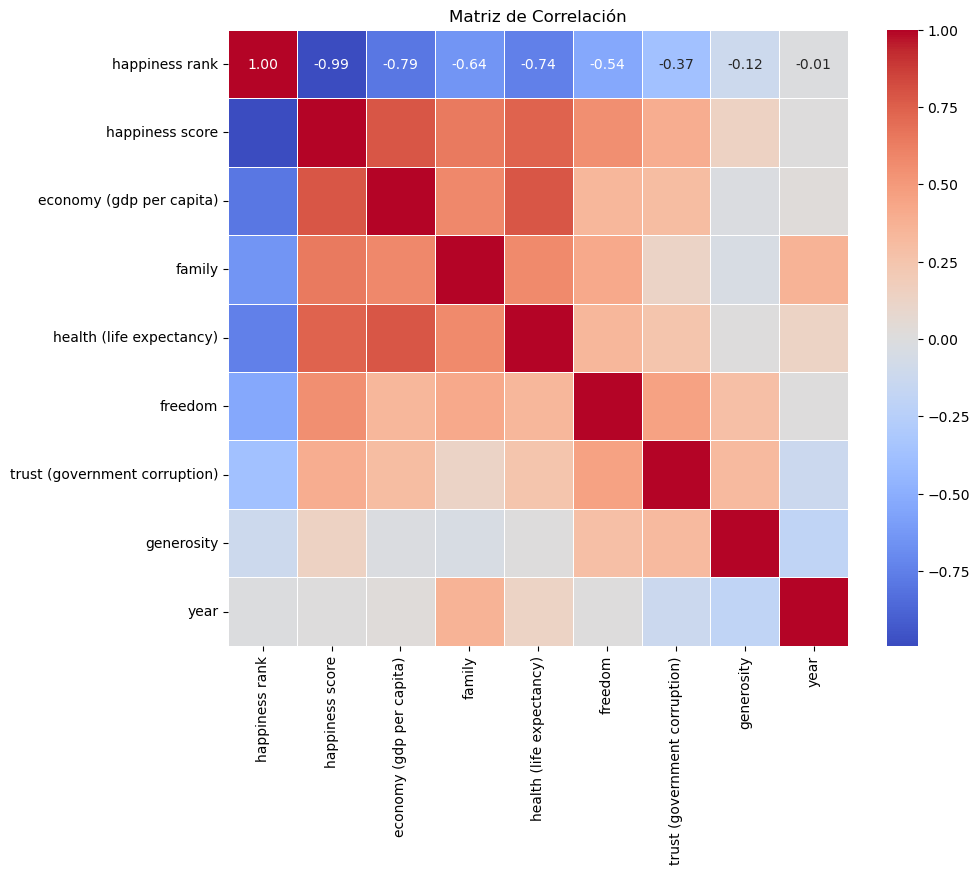

In [32]:
# Crear un DataFrame con los campos numéricos
numeric_data = {
    'happiness rank': model_dataset['happiness rank'],
    'happiness score': model_dataset['happiness score'],
    'economy (gdp per capita)': model_dataset['economy (gdp per capita)'],
    'family': model_dataset['family'],
    'health (life expectancy)': model_dataset['health (life expectancy)'],
    'freedom': model_dataset['freedom'],
    'trust (government corruption)': model_dataset['trust (government corruption)'],
    'generosity': model_dataset['generosity'],
    'year': model_dataset['year']
}
numeric_df = pd.DataFrame(numeric_data)

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# Imprimir la matriz de correlación como texto
# print("Matriz de Correlación:")
# print(correlation_matrix)





## Nuevo dataframe "campos seleccionados para el modelo"

In [33]:
# Campos seleccionados para el modelo
campos_seleccionados = ['economy (gdp per capita)', 'family', 'health (life expectancy)', 'freedom', 'trust (government corruption)', 'happiness score']

# Dataframe con los campos seleccionados
train_model = model_dataset[campos_seleccionados].copy()

print(train_model.head())


   economy (gdp per capita)   family  health (life expectancy)  freedom  \
0                   1.39651  1.34951                   0.94143  0.66557   
1                   1.30232  1.40223                   0.94784  0.62877   
2                   1.32548  1.36058                   0.87464  0.64938   
3                   1.45900  1.33095                   0.88521  0.66973   
4                   1.32629  1.32261                   0.90563  0.63297   

   trust (government corruption)  happiness score  
0                        0.41978            7.587  
1                        0.14145            7.561  
2                        0.48357            7.527  
3                        0.36503            7.522  
4                        0.32957            7.427  


## Entrenamiento modelo 

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = train_model.drop("happiness score", axis=1)
y = train_model["happiness score"]

# Dividir los datos en conjuntos de entrenamiento (70%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo Random Forest Regressor
modelo_random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
modelo_random_forest.fit(X_train, y_train)

# Predecir la variable objetivo en el conjunto de prueba
predicciones = modelo_random_forest.predict(X_test)

# Calcular el error cuadrático medio (MSE) en el conjunto de prueba
mse = mean_squared_error(y_test, predicciones)
print("Error cuadrático medio (MSE) en el conjunto de prueba:", mse)

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_test, predicciones)
print("Coeficiente de determinación R^2:", r2)


Error cuadrático medio (MSE) en el conjunto de prueba: 0.2686580156925615
Coeficiente de determinación R^2: 0.7791328291888953


## Guardar modelo 

In [35]:
joblib_file = "../model/train_model_forest_regressor.pkl"

joblib.dump(modelo_random_forest, joblib_file)


['../model/train_model_forest_regressor.pkl']